# Exploratory analysis of Enron data

The task here is explore the enron dataset to get a feel of the data. We should take a rough look at the different features to get their types, and some descriptive statistics from them.

Also we should see if we can take out some outliers from the dataset.

Lets start by loading the dataset to a dict and printing its keys

In [1]:
import pickle
import pprint
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
### Load the dataset and make it a dict (easy since it's a pickle):
dataset = '/Users/tvikkula/Dev/python/datascience/' +\
          'machineLearn/detect-enron-poi/final_project_dataset.pkl'
data_dict = pickle.load(open(dataset, "r") )

### Check keys of the data_dict
pprint.pprint(data_dict.keys()[0:10])

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F']


It looks like the keys are the names of each person in the dataset. Lets continue exploring the data by printing each key of a certain person.

Lets print all of the keys to see if there are any outliers

In [2]:
pprint.pprint(data_dict.keys())

['METTS MARK',
 'BAXTER JOHN C',
 'ELLIOTT STEVEN',
 'CORDES WILLIAM R',
 'HANNON KEVIN P',
 'MORDAUNT KRISTINA M',
 'MEYER ROCKFORD G',
 'MCMAHON JEFFREY',
 'HORTON STANLEY C',
 'PIPER GREGORY F',
 'HUMPHREY GENE E',
 'UMANOFF ADAM S',
 'BLACHMAN JEREMY M',
 'SUNDE MARTIN',
 'GIBBS DANA R',
 'LOWRY CHARLES P',
 'COLWELL WESLEY',
 'MULLER MARK S',
 'JACKSON CHARLENE R',
 'WESTFAHL RICHARD K',
 'WALTERS GARETH W',
 'WALLS JR ROBERT H',
 'KITCHEN LOUISE',
 'CHAN RONNIE',
 'BELFER ROBERT',
 'SHANKMAN JEFFREY A',
 'WODRASKA JOHN',
 'BERGSIEKER RICHARD P',
 'URQUHART JOHN A',
 'BIBI PHILIPPE A',
 'RIEKER PAULA H',
 'WHALEY DAVID A',
 'BECK SALLY W',
 'HAUG DAVID L',
 'ECHOLS JOHN B',
 'MENDELSOHN JOHN',
 'HICKERSON GARY J',
 'CLINE KENNETH W',
 'LEWIS RICHARD',
 'HAYES ROBERT E',
 'MCCARTY DANNY J',
 'KOPPER MICHAEL J',
 'LEFF DANIEL P',
 'LAVORATO JOHN J',
 'BERBERIAN DAVID',
 'DETMERING TIMOTHY J',
 'WAKEHAM JOHN',
 'POWERS WILLIAM',
 'GOLD JOSEPH',
 'BANNANTINE JAMES M',
 'DUNCAN JOHN H'

There seem to be two quite interesting keys: TOTAL and THE TRAVEL AGENCY IN THE PARK. Lets take a look at what kind of data they include:

In [3]:
pprint.pprint(data_dict['TOTAL'])
pprint.pprint(data_dict['THE TRAVEL AGENCY IN THE PARK'])

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}
{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restri

Unsurprisingly, the values of TOTAL are a bit high. Obviously an outlier as that seems to show the total values of all financial features.

Excluding 'other' and 'total_payments', the THE TRAVEL AGENCY IN THE PARK seems to only include NaN's. Therefore it seems like an outlier too.

In [4]:
data_dict.pop('TOTAL', None)
data_dict.pop('THE TRAVEL AGENCY IN THE PARK', None)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

Lets see the feature-types next:

In [5]:
print 'Feature types:\n'
for key, value in data_dict.itervalues().next().iteritems():
    print key,type(value)

Feature types:

salary <type 'int'>
to_messages <type 'int'>
deferral_payments <type 'str'>
total_payments <type 'int'>
exercised_stock_options <type 'str'>
bonus <type 'int'>
restricted_stock <type 'int'>
shared_receipt_with_poi <type 'int'>
restricted_stock_deferred <type 'str'>
total_stock_value <type 'int'>
expenses <type 'int'>
loan_advances <type 'str'>
from_messages <type 'int'>
other <type 'int'>
from_this_person_to_poi <type 'int'>
poi <type 'bool'>
director_fees <type 'str'>
deferred_income <type 'str'>
long_term_incentive <type 'str'>
email_address <type 'str'>
from_poi_to_this_person <type 'int'>


Lets format the data a bit so we can explore it easier.

In [6]:
import sys
sys.path.append('/Users/tvikkula/Dev/python/datascience/' +\
          'machineLearn/ud120-projects/tools')
sys.path.append('/Users/tvikkula/Dev/python/datascience/' +\
          'machineLearn/detect-enron-poi/')
from preprocess import *
from feature_format import featureFormat, targetFeatureSplit
features_list = getallFeatures(data_dict)
### Extract features and labels from dataset for local testing
data = featureFormat(data_dict, features_list, sort_keys = True)

print '[(name, max, min, mean)]'
pprint.pprint(zip(features_list, data.max(axis=0), data.min(axis=0),
                  data.mean(axis=0)))

[(name, max, min, mean)]
[('poi', 1.0, 0.0, 0.12587412587412589),
 ('salary', 1111258.0, 0.0, 186742.86013986013),
 ('to_messages', 15149.0, 0.0, 1247.2167832167831),
 ('deferral_payments', 6426990.0, -102500.0, 223642.62937062938),
 ('total_payments', 103559793.0, 0.0, 2272322.5874125874),
 ('exercised_stock_options', 34348384.0, 0.0, 2090318.076923077),
 ('bonus', 8000000.0, 0.0, 680724.60839160834),
 ('restricted_stock', 14761694.0, -2604490.0, 874609.97202797199),
 ('shared_receipt_with_poi', 5521.0, 0.0, 707.52447552447552),
 ('restricted_stock_deferred', 15456290.0, -1787380.0, 73931.31468531469),
 ('total_stock_value', 49110078.0, -44093.0, 2930133.7622377621),
 ('expenses', 228763.0, 0.0, 35622.720279720277),
 ('loan_advances', 81525000.0, 0.0, 586888.11188811192),
 ('from_messages', 14368.0, 0.0, 366.12587412587413),
 ('other', 10359729.0, 0.0, 296806.69230769231),
 ('from_this_person_to_poi', 609.0, 0.0, 24.797202797202797),
 ('director_fees', 137864.0, 0.0, 10050.11188811188

Lets see how many rows we have, and how many pois

In [7]:
# Number of features
print len(data)
# Number of POIs
print sum(map(lambda x:x[0]==1, data))

143
18


It seems there are only 143 rows in the data. That is incredibly low. It is curious to see how well can we predict poi's with a dataset this small. Out of the 143 rows, 18 are POIs.

Lets plot these features to see how the descriptive stats really look like. Before doing this, lets normalize each feature in order to not distort the visualization.

The normalization function will be the following:

$$X_{normalized} = \frac{X - X_{min}}{X_{max} - X_{min}}

In [9]:
mins = np.min(data, axis=0)
maxs = np.max(data, axis=0)
data_normal = (data-mins)/(maxs-mins)

After normalizing the data, lets make it a pandas dataframe

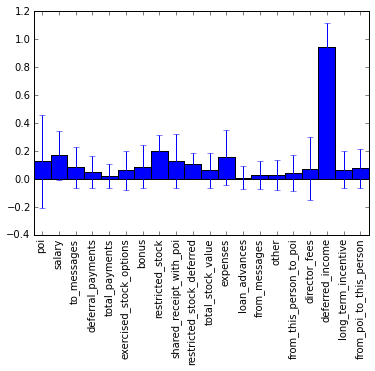

In [10]:
plt.figure()
plt.bar(np.arange(20), np.mean(data_normal, axis=0), 1,
        yerr=np.std(data_normal, axis=0))
plt.xticks(np.arange(0.5, 20, 1), features_list, rotation=90)
plt.show()

It should be noted that the normalized data was used to make it easier to visualize each feature in the same plot.

Most of the mean-values are quite low, but the std's are a bit high. The deferred incomes seem quite high across the board.

Lets see if the values differ on pois:

In [11]:
poidata = featureFormat(data_dict, getallFeatures(data_dict), sort_keys = True)

# filter out non-pois:
poidata = filter(lambda x: x[0] == 1, poidata)
# delete poi-field

poidata = np.delete(poidata, 0, 1)

# scale
mins = np.min(data, axis=0)
maxs = np.max(data, axis=0)
poidata_normal = (poidata-mins)/(maxs-mins)

# plot
plt.figure()
plt.bar(np.arange(20), np.mean(poidata_normal, axis=0), 1,
        yerr=np.std(poidata_normal, axis=0))
plt.xticks(np.arange(0.5, 20, 1), features_list, rotation=90)
plt.show()

ValueError: operands could not be broadcast together with shapes (18,19) (20,) 

Note that the scaling was done on the value-space of all features to prevent scaling differences between plots.

The chart does look a bit different for pois. Many of the values seem slightly higher for pois. Hopefully this is a promising sign for the learning model. 

Interestingly enough, none of the POIs have any director_fees. This may prove a good feature for the model or just signify that a vast majority of the feature values are null. Exploring the data further, it can be determined that most of the data in that feature are in fact NaN.

Out of curiosity, lets make a quick look at the data to see the actual difference between mean values of pois and the whole dataset:

In [12]:
data_subtract = np.mean(data_normal, axis=0) - np.mean(poidata_normal, axis=0)

# plot
plt.figure()
plt.bar(np.arange(20), data_subtract, 1,
        yerr=np.std(data_subtract, axis=0))
plt.xticks(np.arange(0.5, 20, 1), features_list, rotation=90)
plt.show()

NameError: name 'poidata_normal' is not defined

In the plot, negative values mean that the POIs have higher values than the whole dataset. It seems that most features are higher for POIs, especially features like 'salary', 'exercised_stock_options', 'bonus', and 'total_stock_value'.

'director_fees' and 'deferred_income' seem higher for non-POIs (hence the whole dataset values look higher than POI-values).

Lets look at the deferred income distribution as its mean was suspiciously close to 1:

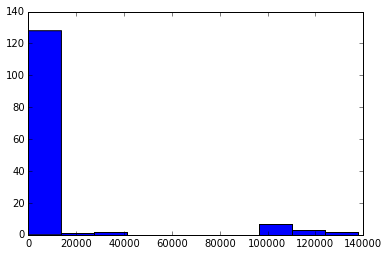

In [13]:
plt.figure()
plt.hist(data[:,16])
plt.show()

It seems the majority of the values are 0, which means that the normalization of the values in the previous chart were a bit misleading.

Lets build a hist of salary:

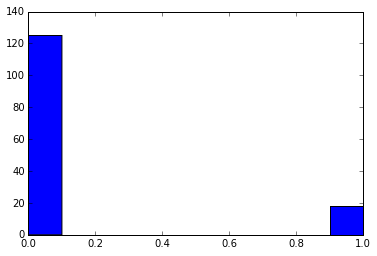

In [14]:
plt.figure()
plt.hist(data[:,0])
plt.show()

There are a lot of people with low salaries

In [15]:
deadbeats = 0
for key, value in data_dict.iteritems():
    if value['salary'] == 'NaN':
        deadbeats = deadbeats + 1
    elif value['salary'] < 1000 or value['salary'] > 800000:
        print key, value['salary']
print 'deadbeats: ' + str(deadbeats)

BANNANTINE JAMES M 477
LAY KENNETH L 1072321
SKILLING JEFFREY K 1111258
FREVERT MARK A 1060932
deadbeats: 50


Out of the 144 datarows, 51 has no salary. The fact that so many data have no salary will be difficult when creating the learning model. Since so many of the dataset have no salary-data, they are difficult to omit from data (as that would omit 35% of our data).

Lay, Skilling, and Frevert have very high salaries that clearly stand out from the rest.

Another suspicios thing is that James Bannantine receives such a low salary. But I think this is more an interesting feature than an outlier. Lets see the data for James Bannantine:

In [16]:
pprint.pprint(data_dict['BANNANTINE JAMES M'])

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': -5104,
 'director_fees': 'NaN',
 'email_address': 'james.bannantine@enron.com',
 'exercised_stock_options': 4046157,
 'expenses': 56301,
 'from_messages': 29,
 'from_poi_to_this_person': 39,
 'from_this_person_to_poi': 0,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 864523,
 'poi': False,
 'restricted_stock': 1757552,
 'restricted_stock_deferred': -560222,
 'salary': 477,
 'shared_receipt_with_poi': 465,
 'to_messages': 566,
 'total_payments': 916197,
 'total_stock_value': 5243487}


Seems he simply makes very little in terms of salary but his total payments are still quite high due to a high 'other'-value. Additionally his stock values are quite high. Despite these curious salary values, he is not considered a POI.

Lets look at the null-values in our other features:

In [17]:
nans = {}
nancount = 0
zeros = 0
for key, value in data_dict.iteritems():
    for subkey in value.keys():
        if value[subkey] == 'NaN':
            nancount = nancount + 1
            if not subkey in nans.keys():
                nans[subkey] = 1
            else:
                nans[subkey] = nans[subkey] + 1
        elif value[subkey] == 0:
            zeros = zeros + 1
print 'NaNs: ' + str(nancount)
print 'Zero values: ' + str(zeros)
pprint.pprint(nans)

NaNs: 1334
Zero values: 158
{'bonus': 63,
 'deferral_payments': 106,
 'deferred_income': 96,
 'director_fees': 128,
 'email_address': 33,
 'exercised_stock_options': 43,
 'expenses': 50,
 'from_messages': 58,
 'from_poi_to_this_person': 58,
 'from_this_person_to_poi': 58,
 'loan_advances': 141,
 'long_term_incentive': 79,
 'other': 53,
 'restricted_stock': 35,
 'restricted_stock_deferred': 127,
 'salary': 50,
 'shared_receipt_with_poi': 58,
 'to_messages': 58,
 'total_payments': 21,
 'total_stock_value': 19}


So many NaN's. 1352 in total. And quite a few in all features.

But looking deeper at what the data is about, this is quite understandable. The data actually consists of features that make up the different forms in which enron employees receive payment - in terms of salary of stock options. Therefore these NaN-values are not really outliers but simply important pieces of the dataset.

That said, the fact that features like 'deferral_payments', 'director_fees', and 'restricted_stock_deferred' consist of mostly NaN-values may affect the learning model.

After the data wrangling, lets save the dataset, both normalized and non-normalized versions.

In [38]:
np.save(open('enrondata.pkl', 'wb'), data)
np.save(open('erondata_normalized.pkl', 'wb'), data_normal)